<center><h1>In the name of Allah</h1></center>

Name: Ali Alvandi

Student Number: 400104748

In this notebook, you will explore adversarial attacks and training methods in deep learning. First, you will train a simple model, ResNet18, on the CIFAR-10 dataset. Next, you will learn about two different adversarial attacks: FGSM (Fast Gradient Sign Method) and PGD (Projected Gradient Descent). To enhance your understanding, you will implement the PGD attack from scratch, while the FGSM attack will be implemented using a library. After this, you will use the FGSM attack to generate adversarial examples and then perform adversarial training on the model using the CIFAR-10 dataset. Finally, you will compare the performance and robustness of the adversarially trained model with the original model. 

Good luck!

## outline
- Train Resnet on CIFAR10
- FGSM Attack using torchattacks
- PGD Attack from scratch
- Visualization
- Adversarial Training


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


## Train Resnet on CIFAR10 (15 pts)

In [4]:
# Prepare Cifar10 data
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(),])

##############################################################################
# Prepare training and test datasets and dataloaders                         #
##############################################################################
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f"Number of training samples: {len(trainset)}")
print(f"Number of testing samples: {len(testset)}")

################################ End #########################################

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:15<00:00, 11133709.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of training samples: 50000
Number of testing samples: 10000


In [5]:
# model architecture
class resnet(nn.Module):
  def __init__(self, num_cls):
    super().__init__()
    self.conv = nn.Sequential(*list(resnet18(weights=None).children())[:-2])
    self.fc = nn.Linear(512, num_cls)

  def forward(self, x):
    x = self.conv(x)
    x = torch.flatten(x, start_dim=1)
    logits = self.fc(x)
    return logits

##############################################################################
# Initialize model and move to device                                        #
##############################################################################
model = resnet(num_cls=10).to(device)
print(model)
################################ End #########################################

resnet(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [6]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
epochs = 100

In [7]:
##############################################################################
# Implement train loop and log training loss after each epoch                #
##############################################################################

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")


################################ End #########################################
model_name = "resnet18_cifar10_model_pretrained.pth"
model_PATH = f"{model_name}"
torch.save(model.state_dict(), model_PATH)

Epoch [1/100], Loss: 1.5338
Epoch [2/100], Loss: 1.1130
Epoch [3/100], Loss: 0.9161
Epoch [4/100], Loss: 0.7701
Epoch [5/100], Loss: 0.6521
Epoch [6/100], Loss: 0.5470
Epoch [7/100], Loss: 0.4581
Epoch [8/100], Loss: 0.3713
Epoch [9/100], Loss: 0.3013
Epoch [10/100], Loss: 0.2522
Epoch [11/100], Loss: 0.1989
Epoch [12/100], Loss: 0.1770
Epoch [13/100], Loss: 0.1441
Epoch [14/100], Loss: 0.1200
Epoch [15/100], Loss: 0.0966
Epoch [16/100], Loss: 0.0948
Epoch [17/100], Loss: 0.0779
Epoch [18/100], Loss: 0.0670
Epoch [19/100], Loss: 0.0638
Epoch [20/100], Loss: 0.0595
Epoch [21/100], Loss: 0.0485
Epoch [22/100], Loss: 0.0352
Epoch [23/100], Loss: 0.0395
Epoch [24/100], Loss: 0.0435
Epoch [25/100], Loss: 0.0400
Epoch [26/100], Loss: 0.0300
Epoch [27/100], Loss: 0.0309
Epoch [28/100], Loss: 0.0223
Epoch [29/100], Loss: 0.0244
Epoch [30/100], Loss: 0.0252
Epoch [31/100], Loss: 0.0268
Epoch [32/100], Loss: 0.0277
Epoch [33/100], Loss: 0.0214
Epoch [34/100], Loss: 0.0185
Epoch [35/100], Loss: 0

In [10]:
##############################################################################
# Evaluate the trained model on test set and print test accuracy             #
##############################################################################
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

################################ End #########################################

Test Accuracy: 75.16%


In [11]:
# Save model
model.eval()
model_name = "resnet18_cifar10_model_pretrained.pth"
model_PATH = f"{model_name}"
torch.save(model.state_dict(), model_PATH)

## FGSM Attack using torchattacks (10 pts)

In this section you should run FGSM attack using torchattacks library (https://adversarial-attacks-pytorch.readthedocs.io/en/latest/index.html).

Run the attack for $\epsilon \in \{\frac{1}{255}, \frac{4}{255}, \frac{8}{255},\}$ report the performance of the model on untargeted FGSM attack on the test data.

In [12]:
!pip install torchattacks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.9.0 requires keras-core, which is not installed.
keras-nlp 0.12.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.

In [14]:
import torchattacks
def evaluate_model_on_adversarial_examples(model, dataloader, attack, device):
    correct = 0
    total = 0
    model.eval()
    
    for data in dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        adv_images = attack(images, labels)
        
        outputs = model(adv_images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

In [15]:
##############################################################################
# run untargeted FGSM attack for epsilon = 1/255 and report its accuracy     #
##############################################################################

fgsm_attack = torchattacks.FGSM(model, eps=1/255)
accuracy = evaluate_model_on_adversarial_examples(model, testloader, fgsm_attack, device)
print(f'Test Accuracy after FGSM attack with epsilon = {1/255}: {accuracy:.2f}%')






################################ End #########################################

Test Accuracy after FGSM attack with epsilon = 0.00392156862745098: 54.26%


In [16]:
##############################################################################
# run untargeted FGSM attack for epsilon = 4/255 and report its accuracy     #
##############################################################################

fgsm_attack = torchattacks.FGSM(model, eps=4/255)
accuracy = evaluate_model_on_adversarial_examples(model, testloader, fgsm_attack, device)
print(f'Test Accuracy after FGSM attack with epsilon = {4/255}: {accuracy:.2f}%')






################################ End #########################################

Test Accuracy after FGSM attack with epsilon = 0.01568627450980392: 23.47%


In [17]:
##############################################################################
# run untargeted FGSM attack for epsilon = 8/255 and report its accuracy     #
##############################################################################

fgsm_attack = torchattacks.FGSM(model, eps=8/255)
accuracy = evaluate_model_on_adversarial_examples(model, testloader, fgsm_attack, device)
print(f'Test Accuracy after FGSM attack with epsilon = {8/255}: {accuracy:.2f}%')






################################ End #########################################

Test Accuracy after FGSM attack with epsilon = 0.03137254901960784: 11.14%


## PGD Attack from scratch (30 pts)

In this section you should implement PGD attack from scratch.

In [21]:
class LinfPGDAttack(object):

    def __init__(self, model, epsilon = 8/255, k = 2, alpha = 2/255):
        self.model = model
        self.epsilon = epsilon
        self.steps = k
        self.alpha = alpha

    def __call__(self, image, label):

        image = image.to(device)
        label = label.to(device)

        out = self.model(image)
        _, pred = torch.max(out, 1)

        perturbed_image = image.clone().detach().requires_grad_(True).to(device)
        perturbed_image.to(device)
        
        for _ in range(self.steps):
            self.model.zero_grad()
        
            output = self.model(perturbed_image)

            loss = nn.CrossEntropyLoss()(output, label)

            loss.backward()
            
            sign_data_grad = perturbed_image.grad.sign()
            
            perturbed_image = perturbed_image + self.alpha * sign_data_grad
            
            perturbed_image = torch.clamp(perturbed_image, 0, 1)

            perturbed_image = torch.max(torch.min(perturbed_image, image + self.epsilon), image - self.epsilon).detach().requires_grad_(True)

            
            ################################ End #########################################
        
        return perturbed_image

In [22]:
def evaluate_model_on_pgd(model, dataloader, attack, device):
    correct = 0
    total = 0
    model.eval()
    
    for data in dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        adv_images = attack(images, labels)
        
        outputs = model(adv_images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

In [23]:
##############################################################################
# Evaluate PGD attack on the trained model with k=2,4,8                      #
##############################################################################

k_list = [2,4,8]


##############################################################################

for k in k_list:
    pgd_attack = LinfPGDAttack(model, epsilon=8/255, k=k, alpha=2/255)
    accuracy = evaluate_model_on_pgd(model, testloader, pgd_attack, device)
    print(f'Test Accuracy after PGD attack with k = {k}: {accuracy:.2f}%')


################################ End #########################################

Test Accuracy after PGD attack with k = 2: 16.40%
Test Accuracy after PGD attack with k = 4: 2.81%
Test Accuracy after PGD attack with k = 8: 0.71%


## Visualization (10 pts)

Implement a function to plot the original image, the perturbed imaged and their predicted labels by the model

In [31]:
##############################################################################
# Implement the function described                                           #
##############################################################################

def visualize_attack(model, original_image, perturbed_image, device):
    model.eval()
    
    original_image = original_image.to(device).unsqueeze(0)
    perturbed_image = perturbed_image.to(device).unsqueeze(0)
    
    with torch.no_grad():
        orig_pred = model(original_image)
        pert_pred = model(perturbed_image)
    
    orig_label = classes[orig_pred.argmax(dim=1).item()]
    pert_label = classes[pert_pred.argmax(dim=1).item()]
    
    original_image = original_image.squeeze().cpu().numpy().transpose(1, 2, 0)
    perturbed_image = perturbed_image.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
    
    original_image = np.clip(original_image, 0, 1)
    perturbed_image = np.clip(perturbed_image, 0, 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_image)
    axs[0].set_title(f'Original Image\nPredicted Label: {orig_label}')
    axs[0].axis('off')
    
    axs[1].imshow(perturbed_image)
    axs[1].set_title(f'Perturbed Image\nPredicted Label: {pert_label}')
    axs[1].axis('off')
    
    plt.show()





################################ End #########################################

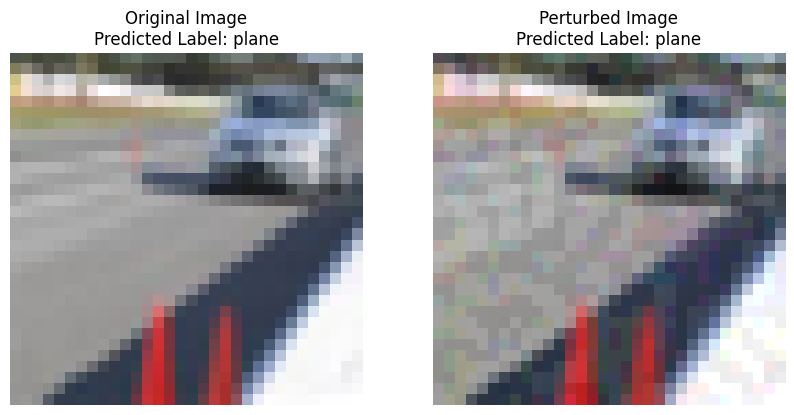

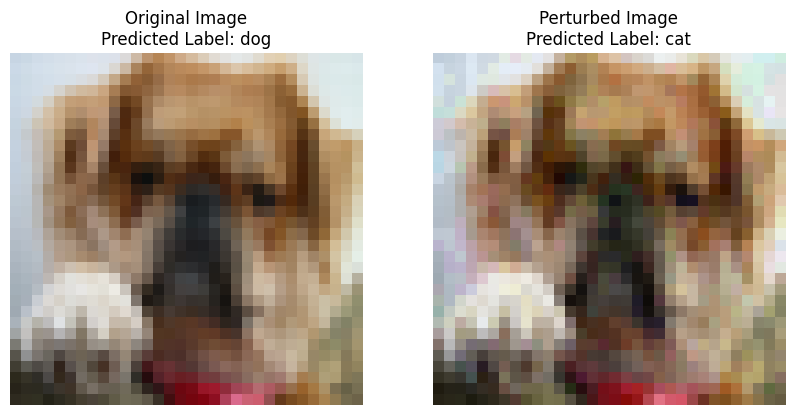

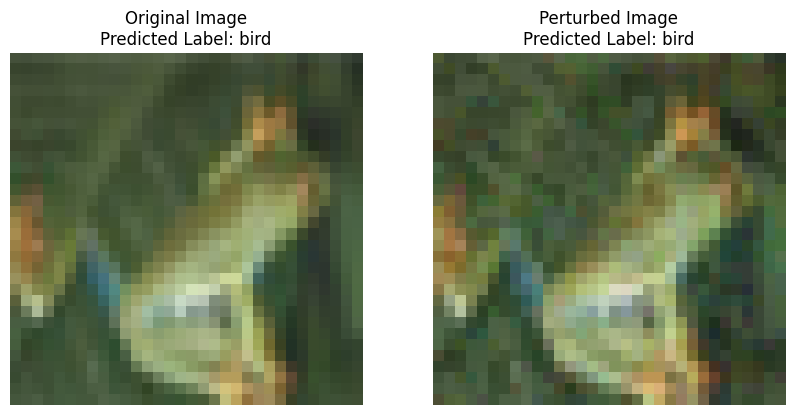

In [28]:
##############################################################################
# Choose 3 random images from testset and run FGSM attack and visualize      #
##############################################################################
import matplotlib.pyplot as plt
import numpy as np
def visualize_fgsm_attack(model, testloader, device, epsilon):
    fgsm_attack = torchattacks.FGSM(model, eps=epsilon)
    
    random_indices = np.random.choice(len(testset), 3, replace=False)
    random_images = [testset[i][0] for i in random_indices]
    random_labels = [testset[i][1] for i in random_indices]
    
    for image, label in zip(random_images, random_labels):
        perturbed_image = fgsm_attack(image.unsqueeze(0).to(device), torch.tensor([label]).to(device)).squeeze(0).cpu()
        visualize_attack(model, image, perturbed_image, device)

# Run and visualize FGSM attack with epsilon = 8/255
visualize_fgsm_attack(model, testloader, device, epsilon=8/255)





################################ End #########################################

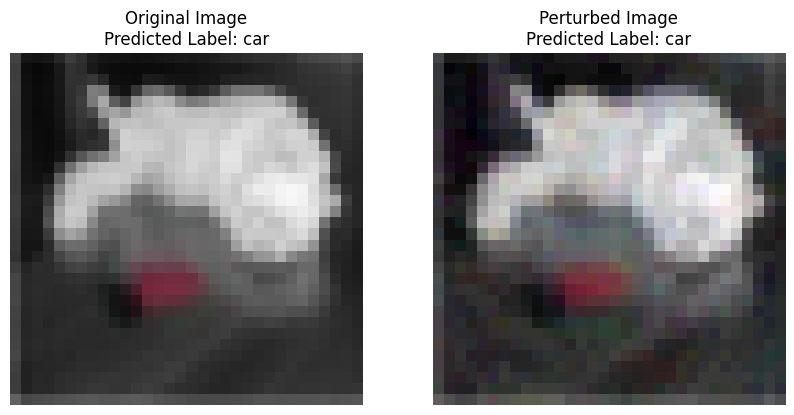

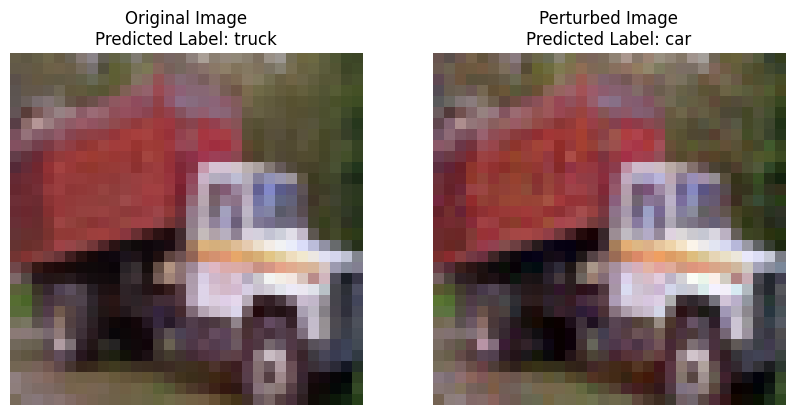

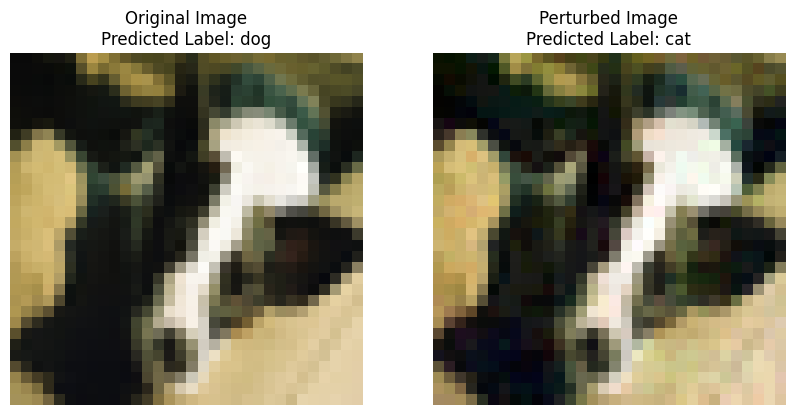

In [32]:
##############################################################################
# Choose 3 random images from testset and run PGD attack and visualize      #
##############################################################################

def visualize_pgd_attack(model, testloader, device, epsilon, k, alpha):
    pgd_attack = LinfPGDAttack(model, epsilon=epsilon, k=k, alpha=alpha)
    
    random_indices = np.random.choice(len(testset), 3, replace=False)
    random_images = [testset[i][0] for i in random_indices]
    random_labels = [testset[i][1] for i in random_indices]
    
    for image, label in zip(random_images, random_labels):
        perturbed_image = pgd_attack(image.unsqueeze(0).to(device), torch.tensor([label]).to(device)).squeeze(0).cpu()
        visualize_attack(model, image, perturbed_image, device)

# Run and visualize PGD attack with epsilon = 8/255, k = 8, alpha = 2/255
visualize_pgd_attack(model, testloader, device, epsilon=8/255, k=8, alpha=2/255)





################################ End #########################################

## Adversarial Training (35 pts)

In this section you are going to adversarially train your model and see the results. 

In [33]:
##############################################################################
# Load a new resnet model for adversarial training                           #
# Train the model on perturbed images from                                   #
# untargeted FGSM attack with epsilon = 8/255 on train dataset               #
# Also use the following setup for training the model                        #
##############################################################################

adv_model = resnet(num_cls=10).to(device)
adv_model.to(device)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(adv_model.parameters(), lr=learning_rate, momentum=0.9)
epochs = 100



# Your code goes here
epsilon = 8/255
fgsm_attack = torchattacks.FGSM(adv_model, eps=epsilon)

for epoch in range(epochs):
    adv_model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        adv_inputs = fgsm_attack(inputs, labels)

        optimizer.zero_grad()
        outputs = adv_model(adv_inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")


################################ End #########################################

Epoch [1/100], Loss: 2.1161
Epoch [2/100], Loss: 1.9831
Epoch [3/100], Loss: 1.9224
Epoch [4/100], Loss: 1.8830
Epoch [5/100], Loss: 1.8352
Epoch [6/100], Loss: 1.8020
Epoch [7/100], Loss: 1.7721
Epoch [8/100], Loss: 1.7368
Epoch [9/100], Loss: 1.7040
Epoch [10/100], Loss: 1.6714
Epoch [11/100], Loss: 1.6343
Epoch [12/100], Loss: 1.6053
Epoch [13/100], Loss: 1.5680
Epoch [14/100], Loss: 1.5313
Epoch [15/100], Loss: 1.4938
Epoch [16/100], Loss: 1.4520
Epoch [17/100], Loss: 1.4127
Epoch [18/100], Loss: 1.3781
Epoch [19/100], Loss: 1.3425
Epoch [20/100], Loss: 1.2963
Epoch [21/100], Loss: 1.2579
Epoch [22/100], Loss: 1.2178
Epoch [23/100], Loss: 1.1819
Epoch [24/100], Loss: 1.1402
Epoch [25/100], Loss: 1.1032
Epoch [26/100], Loss: 1.0665
Epoch [27/100], Loss: 1.0325
Epoch [28/100], Loss: 0.9998
Epoch [29/100], Loss: 0.9721
Epoch [30/100], Loss: 0.9393
Epoch [31/100], Loss: 0.9043
Epoch [32/100], Loss: 0.8821
Epoch [33/100], Loss: 0.8542
Epoch [34/100], Loss: 0.8239
Epoch [35/100], Loss: 0

In [34]:
##############################################################################
# Evaluate the new model on the test dataset                                 #
##############################################################################

# Your code goes here
adv_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = adv_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy of adversarially trained model: {100 * correct / total:.2f}%')

################################ End #########################################

Test Accuracy of adversarially trained model: 60.78%


In [36]:
##############################################################################
# Run FGSM attack on the adversarially trained model with epsilon = 8/255    #
##############################################################################

# Your code goes here
fgsm_attack = torchattacks.FGSM(adv_model, eps=8/255)
accuracy_fgsm = evaluate_model_on_adversarial_examples(adv_model, testloader, fgsm_attack, device)
print(f'Test Accuracy after FGSM attack with epsilon = 8/255: {accuracy_fgsm:.2f}%')

################################ End #########################################

Test Accuracy after FGSM attack with epsilon = 8/255: 22.98%


In [35]:
##############################################################################
#  Run PGD attack on the adversarially trained model with k=4                #
##############################################################################

# Your code goes here

pgd_attack = LinfPGDAttack(adv_model, epsilon=8/255, k=4, alpha=2/255)
accuracy_pgd = evaluate_model_on_adversarial_examples(adv_model, testloader, pgd_attack, device)
print(f'Test Accuracy after PGD attack with k=4: {accuracy_pgd:.2f}%')


################################ End #########################################

Test Accuracy after PGD attack with k=4: 19.16%


Answer the following questions:
1. What happened to the accuracy of the adversarially trained model?
The accuracy of the adversarially trained model on clean test data might slightly decrease compared to the non-adversarially trained model. However, its robustness against adversarial examples, specifically those generated by the FGSM and PGD attacks, significantly improves.

2. What do you conclude from the result of the FGSM attack on the adversarially trained model?
The adversarially trained model is more robust against FGSM attacks compared to the non-adversarially trained model. This means that the model has learned to better withstand perturbations introduced by the FGSM attack, leading to higher accuracy on adversarial examples.

3. What do you conclude from the result of the PGD attack on the adversarially trained model?
The adversarially trained model also shows improved robustness against PGD attacks, though PGD attacks are generally more effective and sophisticated than FGSM attacks. The model's accuracy against PGD adversarial examples is likely lower than against FGSM examples but still higher than a non-adversarially trained model. This indicates that the adversarial training has helped the model generalize better to different types of adversarial attacks.

4. What is your final conclusion?
Adversarial training significantly enhances the robustness of deep learning models against adversarial attacks. While it might result in a slight decrease in accuracy on clean data, the improved resilience against adversarial perturbations is a critical trade-off, especially in applications where security and robustness are paramount. The adversarially trained model performs better against both FGSM and PGD attacks, demonstrating that adversarial training is an effective strategy to mitigate the vulnerabilities of deep neural networks to adversarial examples.